In [ ]:
!pip install tensorflow --upgrade
import tensorflow as tf
tf.__version__

In [10]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models, layers, optimizers
import numpy as np
import matplotlib.pyplot as plt # matplotlib is used for data visualization

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
print('words:', train_data[0])
print('labels:', train_labels[0])


In [ ]:
word_index = imdb.get_word_index()
print(word_index)

In [ ]:
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
decoded_review = ''.join([reverse_word_index.get(i-3, '?')for i in train_data[0]])
print(decoded_review)

In [18]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension)) 
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1. 
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data) 

In [21]:
x_train.shape
print(x_train[0])

(25000, 10000)

In [22]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [23]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape= (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [27]:
x_val.shape
partial_x_train.shape

(15000, 10000)

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
 validation_data=(x_val, y_val))

In [ ]:
history_dict = history.history
# history_dict.keys()
print(history_dict)

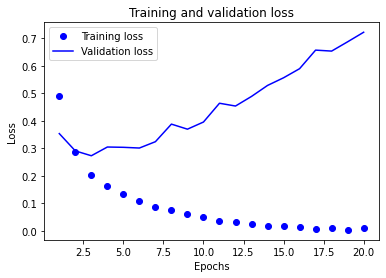

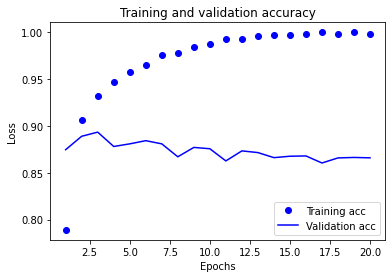

In [36]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')   
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.predict(x_test)